# Eficiencia intrínseca de los detectores B y C

Para realizar el análisis de esta parte, hemos tomado datos con 2 configuraciones de trigger diferentes: BC variando el alto voltaje en AD y AD variando el alto voltaje en BC.
Para cada configuración, podemos representar el número de disparos frente al número de detecciones y realizar comparaciones.

#### Este Notebook corresponde al análisis de los detectores BC, es decir, tomaremos los datos con confirguraciones de trigger en AD.

Cargamos los módulos necesarios:

In [1]:
import numpy as np
import matplotlib.pylab as plt
import scipy.optimize as so
import scipy.special as se #para el factorial
import pandas as pd
from decimal import * #para las cifras significativas
from tabulate import tabulate

Cargamos los datos desde los archivos txt.

In [2]:
def leerArchivo(archivo):
    completo = open(archivo, 'r')
    tiempos = []
    datos = []
    contador = 0
    for linea in completo: #recorremos cada línea del archivo
        if len(linea) == 1: #len cuenta los bytes de cada linea: si tiene 1 byte es porque cuenta el salto de linea como \n
            continue
        else: #en otro caso, será algún dato de interés
            numero_elementos = linea.split() #guardamos los elementos de la línea
            if len(numero_elementos) == 1: #si hay un solo elemento, será el tiempo unix
                tiempos.append(numero_elementos)
                contador += 1
            else: #en otro caso, será alguno de los otros datos
                datos.append(numero_elementos)
                contador += 1
    
    #el resultado de este bucle es una lista de listas, lo cual no nos interesa porque queremos trabajar con elementos que sean números
    tamaño = len(tiempos)
    tiempos_unix = [] #almacenamos aquí el tiempo unix
    for i in range(tamaño):
        tiempos_unix.append(int(tiempos[i][0]))
    
    #leemos también los datos de los tiempos en ns y las amplitudes de la señal
    tiempos_volt = [] #tiempos de registro de amplitudes de señal (cada 4 ns)
    numero_iteraciones = len(datos)
    for j in range(numero_iteraciones):
        tiempos_volt.append(int(datos[j][0]))
    medidasA = [] #amplitudes detector A
    for k in range(numero_iteraciones):
        medidasA.append(int(datos[k][1]))
    medidasB = [] #amplitudes detector B
    for l in range(numero_iteraciones):
        medidasB.append(int(datos[l][2]))
    medidasC = [] #amplitudes detector C
    for m in range(numero_iteraciones):
        medidasC.append(int(datos[m][3]))
    medidasD = [] #amplitudes detector D
    for n in range(numero_iteraciones):
        medidasD.append(int(datos[n][4]))
    
    return tiempos_unix, tiempos_volt, medidasA, medidasB, medidasC, medidasD, datos

In [31]:
medidas = leerArchivo('AD_1050mv.txt')[6]
unix = leerArchivo('AD_1050mv.txt')[0]

#la función nos devuelve listas con strings, así que pasamos los elementos a float
for i in range(len(medidas)):
    for j in range(len(medidas[i])):
        if type(medidas[i][j]) == str:
            medidas[i][j] = float(medidas[i][j])

#número de triggers = número de tiempos unix
n_sep = len(unix)
#creamos una lista de n_sep listas vacías donde almacenaremos los datos de cada medida
datos = [[] for k in range(n_sep)]

i = 1
for j in range(len(datos)):
    while medidas[i-1][0] < medidas[i][0] and i < (len(medidas)-1):
        datos[j].append(medidas[i-1])
        i += 1
    else:
        i += 1

Determinamos los mínimos de cada evento

In [32]:
t_min_A = []
t_min_B = []
t_min_C = []
t_min_D = []

V_min_A = []
V_min_B = []
V_min_C = []
V_min_D = []

def parabola(x, a, b, c):
    return a*x**2 + b*x + c

for i in range(len(datos)):
    
    t = []
    
    detA = []
    detB = []
    detC = []
    detD = []
    
    for j in range(len(datos[i])):
        t.append(datos[i][j][0])
        detA.append(datos[i][j][1])
        detB.append(datos[i][j][2])
        detC.append(datos[i][j][3])
        detD.append(datos[i][j][4])
    
    t_aux = np.linspace(30,100,1000)
    ###############################################
    indice_min_A = detA.index(min(detA))
    if indice_min_A == (len(detA)-1): #si el mínimo está en el último elemento, añade una nueva línea igual a la penúltima para poder hacer el ajuste a tres puntos
                detA.append(detA[indice_min_A-1])
                t.append(t[indice_min_A] + t[indice_min_A] - t[indice_min_A])
    lA = indice_min_A
    tA = [t[lA-1], t[lA], t[lA+1]]
    ajusteA = [detA[lA-1], detA[lA], detA[lA+1]]
    if min(detA) < -50:
        solA, covA = so.curve_fit(parabola, tA, ajusteA)
        aA = solA[0] ; bA = solA[1] ; cA = solA[2]
        VA = aA*t_aux**2 + bA*t_aux + cA
        V_min_A.append(min(VA))
        t_min_A.append(t_aux[list(VA).index(min(VA))])
    else:
        V_min_A.append(0)
        t_min_A.append(0)
    ###############################################
    indice_min_B = detB.index(min(detB))
    if indice_min_B == (len(detB)-1):
                detB.append(detB[indice_min_B-1])
                t.append(t[indice_min_B] + t[indice_min_B] - t[indice_min_B])
    lB = indice_min_B
    tB = [t[lB-1], t[lB], t[lB+1]]
    ajusteB = [detB[lB-1], detB[lB], detB[lB+1]]
    if min(detB) < -50:
        solB, covB = so.curve_fit(parabola, tB, ajusteB)
        aB = solB[0] ; bB = solB[1] ; cB = solB[2]
        VB = aB*t_aux**2 + bB*t_aux + cB
        V_min_B.append(min(VB))
        t_min_B.append(t_aux[list(VB).index(min(VB))])
    else:
        V_min_B.append(0)
        t_min_B.append(0)
    ###############################################
    indice_min_C = detC.index(min(detC))
    if indice_min_C == (len(detC)-1):
                detC.append(detC[indice_min_C-1])
                t.append(t[indice_min_C] + t[indice_min_C] - t[indice_min_C])
    lC = indice_min_C
    tC = [t[lC-1], t[lC], t[lC+1]]
    ajusteC = [detC[lC-1], detC[lC], detC[lC+1]]
    if min(detC) < -50:
        solC, covC = so.curve_fit(parabola, tC, ajusteC)
        aC = solC[0] ; bC = solC[1] ; cC = solC[2]
        VC = aC*t_aux**2 + bC*t_aux + cC
        V_min_C.append(min(VC))
        t_min_C.append(t_aux[list(VC).index(min(VC))])
    else:
        V_min_C.append(0)
        t_min_C.append(0)
    ###############################################
    indice_min_D = detD.index(min(detD))
    if indice_min_D == (len(detD)-1):
                detD.append(detD[indice_min_D-1])
                t.append(t[indice_min_D] + t[indice_min_D] - t[indice_min_D])
    lD = indice_min_D
    tD = [t[lD-1], t[lD], t[lD+1]]
    if min(detD) < -50:
        ajusteD = [detD[lD-1], detD[lD], detD[lD+1]]
        solD, covD = so.curve_fit(parabola, tD, ajusteD)
        aD = solD[0] ; bD = solD[1] ; cD = solD[2]
        VD = aD*t_aux**2 + bD*t_aux + cD
        V_min_D.append(min(VD))
        t_min_D.append(t_aux[list(VD).index(min(VD))])
    else:
        V_min_D.append(0)
        t_min_D.append(0)
    ###############################################

Como el programa del laboratorio solo permitía configurar el trigger en A y B, las columnas no están ordenadas como los detectores. Guardamos los datos en orden en unas nuevas variables.

#### Conf AD ---> C1=A, C2=D, C3=C, C4=D

###############################################################################################################################

#### V = 900 mV

In [5]:
detA900 = V_min_A
detB900 = V_min_D ### columnas no ordenadas con los detectores
detC900 = V_min_C
detD900 = V_min_D

disparosB900 = 0
disparosC900 = 0

for i in range(len(detA900)):
    if abs(detB900[i]) >= 150:
        disparosB900 = disparosB900 + 1
    if abs(detC900[i]) >= 150:
        disparosC900 = disparosC900 + 1

In [6]:
print('-----------------------------------')
print('Número de disparos del detector B: ', disparosB900)
print('Número de disparos del detector C: ', disparosC900)

-----------------------------------
Número de disparos del detector B:  333
Número de disparos del detector C:  909


#### V = 920 mV

In [9]:
detA920 = V_min_A
detB920 = V_min_D
detC920 = V_min_C
detD920 = V_min_D

disparosB920 = 0
disparosC920 = 0

for i in range(len(detA920)):
    if abs(detB920[i]) >= 150:
        disparosB920 = disparosB920 + 1
    if abs(detC920[i]) >= 150:
        disparosC920 = disparosC920 + 1

In [10]:
print('-----------------------------------')
print('Número de disparos del detector B: ', disparosB920)
print('Número de disparos del detector C: ', disparosC920)

-----------------------------------
Número de disparos del detector B:  469
Número de disparos del detector C:  927


#### V = 940 mV

In [13]:
detA940 = V_min_A
detB940 = V_min_D
detC940 = V_min_C
detD940 = V_min_D

disparosB940 = 0
disparosC940 = 0

for i in range(len(detA940)):
    if abs(detB940[i]) >= 150:
        disparosB940 = disparosB940 + 1
    if abs(detC940[i]) >= 150:
        disparosC940 = disparosC940 + 1

In [14]:
print('-----------------------------------')
print('Número de disparos del detector B: ', disparosB940)
print('Número de disparos del detector C: ', disparosC940)

-----------------------------------
Número de disparos del detector B:  604
Número de disparos del detector C:  931


#### V = 960 mV

In [17]:
detA960 = V_min_A
detB960 = V_min_D
detC960 = V_min_C
detD960 = V_min_D

disparosB960 = 0
disparosC960 = 0

for i in range(len(detA960)):
    if abs(detB960[i]) >= 150:
        disparosB960 = disparosB960 + 1
    if abs(detC960[i]) >= 150:
        disparosC960 = disparosC960 + 1

In [18]:
print('-----------------------------------')
print('Número de disparos del detector B: ', disparosB960)
print('Número de disparos del detector C: ', disparosC960)

-----------------------------------
Número de disparos del detector B:  726
Número de disparos del detector C:  927


#### V = 980 mV

In [21]:
detA980 = V_min_A
detB980 = V_min_D
detC980 = V_min_C
detD980 = V_min_D

disparosB980 = 0
disparosC980 = 0

for i in range(len(detA980)):
    if abs(detB980[i]) >= 150:
        disparosB980 = disparosB980 + 1
    if abs(detC980[i]) >= 150:
        disparosC980 = disparosC980 + 1

In [22]:
print('-----------------------------------')
print('Número de disparos del detector B: ', disparosB980)
print('Número de disparos del detector C: ', disparosC980)

-----------------------------------
Número de disparos del detector B:  792
Número de disparos del detector C:  937


#### V = 1000 mV

In [25]:
detA1000 = V_min_A
detB1000 = V_min_D
detC1000 = V_min_C
detD1000 = V_min_D

disparosB1000 = 0
disparosC1000 = 0

for i in range(len(detA1000)):
    if abs(detB1000[i]) >= 150:
        disparosB1000 = disparosB1000 + 1
    if abs(detC1000[i]) >= 150:
        disparosC1000 = disparosC1000 + 1

In [26]:
print('-----------------------------------')
print('Número de disparos del detector B: ', disparosB1000)
print('Número de disparos del detector C: ', disparosC1000)

-----------------------------------
Número de disparos del detector B:  844
Número de disparos del detector C:  952


#### V = 1020 mV

In [29]:
detA1020 = V_min_A
detB1020 = V_min_D
detC1020 = V_min_C
detD1020 = V_min_D

disparosB1020 = 0
disparosC1020 = 0

for i in range(len(detA1020)):
    if abs(detB1020[i]) >= 150:
        disparosB1020 = disparosB1020 + 1
    if abs(detC1020[i]) >= 150:
        disparosC1020 = disparosC1020 + 1

In [30]:
print('-----------------------------------')
print('Número de disparos del detector B: ', disparosB1020)
print('Número de disparos del detector C: ', disparosC1020)

-----------------------------------
Número de disparos del detector B:  904
Número de disparos del detector C:  936


#### V = 1050 mV

In [33]:
detA1050 = V_min_A
detB1050 = V_min_D
detC1050 = V_min_C
detD1050 = V_min_D

disparosB1050 = 0
disparosC1050 = 0

for i in range(len(detA1050)):
    if abs(detB1050[i]) >= 150:
        disparosB1050 = disparosB1050 + 1
    if abs(detC1050[i]) >= 150:
        disparosC1050 = disparosC1050 + 1

In [34]:
print('-----------------------------------')
print('Número de disparos del detector B: ', disparosB1050)
print('Número de disparos del detector C: ', disparosC1050)

-----------------------------------
Número de disparos del detector B:  903
Número de disparos del detector C:  938


###############################################################################################################################

### Resultados

In [37]:
#definimos los vectores donde almacenamos los resultados
disparosB = np.array([disparosB900, disparosB920, disparosB940, disparosB960, disparosB980, disparosB1000, disparosB1020, disparosB1050])
disparosC = np.array([disparosC900, disparosC920, disparosC940, disparosC960, disparosC980, disparosC1000, disparosC1020, disparosC1050])

#definimos también el % de detección
disparos_totales = 1000 # =len(detA)=len(detD)
EfB = disparosB / (disparos_totales*0.9588)
EfC= disparosC / (disparos_totales*0.9588)

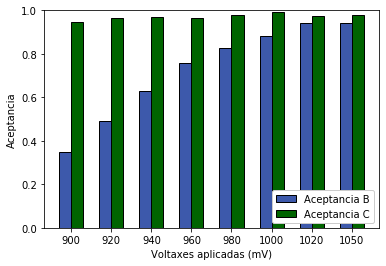

In [38]:
voltajes = ['900', '920', '940', '960', '980', '1000', '1020', '1050']
  
X_axis = np.arange(len(voltajes))
  
plt.bar(X_axis - 0.15, EfB, width = 0.3, label = 'Aceptancia B', color='#3D59AB', edgecolor='black')
plt.bar(X_axis + 0.15, EfC, width = 0.3, label = 'Aceptancia C', color='#006400', edgecolor='black')
  
plt.xticks(X_axis, voltajes)
plt.xlabel("Voltaxes aplicadas (mV)")
plt.ylabel("Aceptancia")
#plt.title("Aceptancia de los detectores")
plt.ylim(0,1)
plt.legend(loc='lower right', framealpha=1)
plt.savefig('EfBC.pdf')
plt.show()

In [39]:
#Mostramos los resultados para B
resultados = [['900', disparosB[0] , EfB[0]*100],
['920', disparosB[1], EfB[1]*100],
['940', disparosB[2], EfB[2]*100],
['960', disparosB[3], EfB[3]*100],
['980', disparosB[4], EfB[4]*100],
['1000', disparosB[5], EfB[5]*100],
['1020', disparosB[6], EfB[6]*100],
['1050', disparosB[7], EfB[7]*100]]

print (tabulate(resultados, headers=["Voltaje (mV)", "Partículas detectadas", "% detección"], tablefmt='fancy_grid'))

╒════════════════╤═════════════════════════╤═══════════════╕
│   Voltaje (mV) │   Partículas detectadas │   % detección │
╞════════════════╪═════════════════════════╪═══════════════╡
│            900 │                     333 │       34.7309 │
├────────────────┼─────────────────────────┼───────────────┤
│            920 │                     469 │       48.9153 │
├────────────────┼─────────────────────────┼───────────────┤
│            940 │                     604 │       62.9954 │
├────────────────┼─────────────────────────┼───────────────┤
│            960 │                     726 │       75.7196 │
├────────────────┼─────────────────────────┼───────────────┤
│            980 │                     792 │       82.6033 │
├────────────────┼─────────────────────────┼───────────────┤
│           1000 │                     844 │       88.0267 │
├────────────────┼─────────────────────────┼───────────────┤
│           1020 │                     904 │       94.2845 │
├────────────────┼──────

In [40]:
#Mostramos los resultados para C
resultados = [['900', disparosC[0] , EfC[0]*100],
['920', disparosC[1], EfC[1]*100],
['940', disparosC[2], EfC[2]*100],
['960', disparosC[3], EfC[3]*100],
['980', disparosC[4], EfC[4]*100],
['1000', disparosC[5], EfC[5]*100],
['1020', disparosC[6], EfC[6]*100],
['1050', disparosC[7], EfC[7]*100]]

print (tabulate(resultados, headers=["Voltaje (mV)", "Partículas detectadas", "% detección"], tablefmt='fancy_grid'))

╒════════════════╤═════════════════════════╤═══════════════╕
│   Voltaje (mV) │   Partículas detectadas │   % detección │
╞════════════════╪═════════════════════════╪═══════════════╡
│            900 │                     909 │       94.806  │
├────────────────┼─────────────────────────┼───────────────┤
│            920 │                     927 │       96.6834 │
├────────────────┼─────────────────────────┼───────────────┤
│            940 │                     931 │       97.1005 │
├────────────────┼─────────────────────────┼───────────────┤
│            960 │                     927 │       96.6834 │
├────────────────┼─────────────────────────┼───────────────┤
│            980 │                     937 │       97.7263 │
├────────────────┼─────────────────────────┼───────────────┤
│           1000 │                     952 │       99.2908 │
├────────────────┼─────────────────────────┼───────────────┤
│           1020 │                     936 │       97.622  │
├────────────────┼──────